In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

triads = [['BPS'+str(i),'BPS'+str(i+20),'BPS'+str(i+40)] for i in range(1,21)]


#import series, add datetimeindex
from adtk.data import validate_series
df=pd.read_csv('LFC Bad data/LFC_Bad_3.csv')
dti=pd.date_range('00:00:00', periods= len(df), freq= "1S")
df.set_index(dti, inplace=True)
df=validate_series(df)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

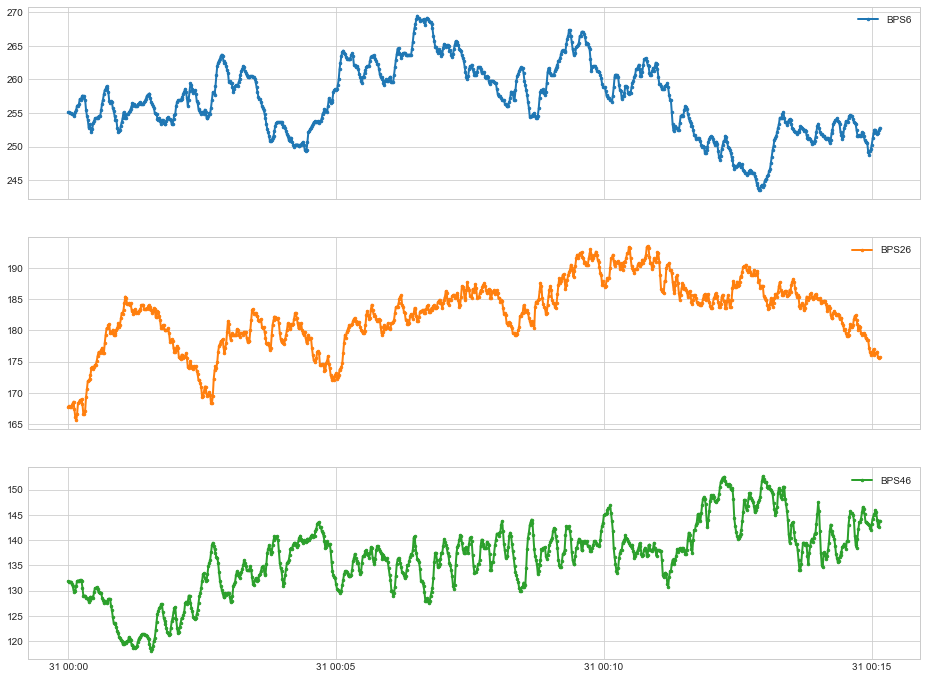

In [181]:
from adtk.visualization import plot
plot(df[triads[5]],ts_linewidth=2, ts_markersize=5)

(array([ 9., 12., 19.,  9., 16., 65., 74., 84., 96., 50., 73., 69., 63.,
        78., 56., 59., 38., 13.,  9., 18.]),
 array([243.5, 244.8, 246.1, 247.4, 248.7, 250. , 251.3, 252.6, 253.9,
        255.2, 256.5, 257.8, 259.1, 260.4, 261.7, 263. , 264.3, 265.6,
        266.9, 268.2, 269.5]),
 <BarContainer object of 20 artists>)

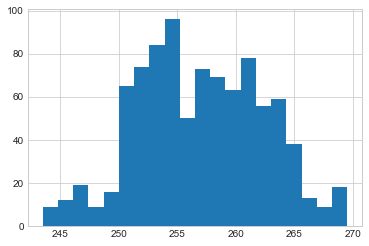

In [55]:
plt.hist(df[triads[5][0]], bins=20)

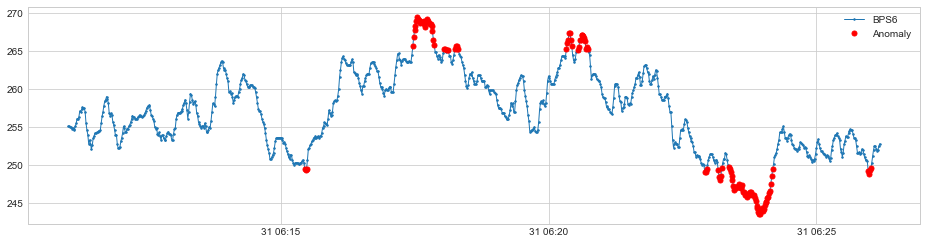

In [56]:
from adtk.detector import ThresholdAD
threshold_ad= ThresholdAD(high=265, low=250)
anomalies= threshold_ad.detect(df[triads[5][0]])
plot(df[triads[5][0]], anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

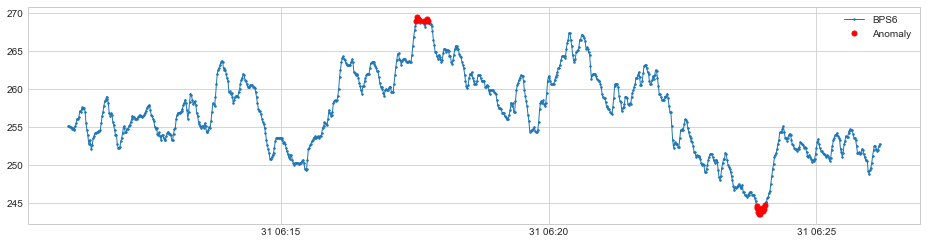

In [57]:
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies = quantile_ad.fit_detect(df[triads[5][0]])
plot(df[triads[5][0]], anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

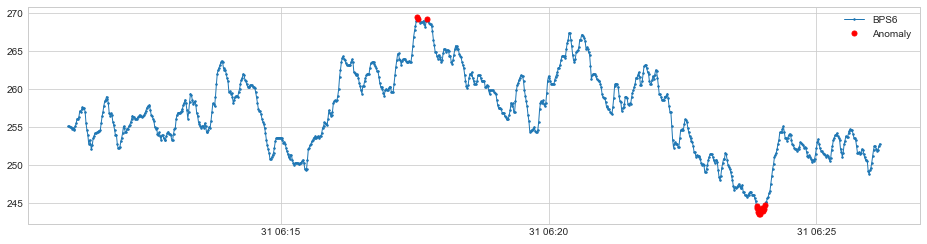

In [60]:
from adtk.detector import InterQuartileRangeAD
iqr_ad = InterQuartileRangeAD(c=1)
anomalies = iqr_ad.fit_detect(df[triads[5][0]])
plot(df[triads[5][0]], anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

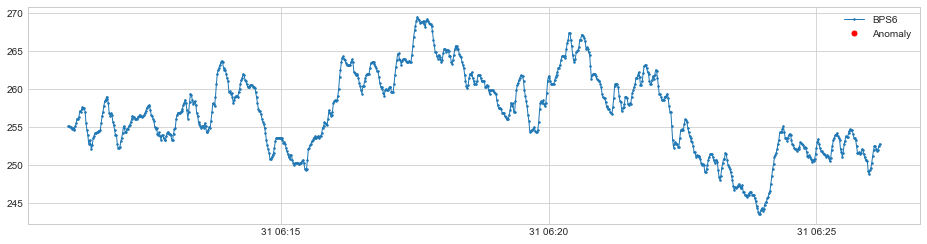

In [66]:
from adtk.detector import GeneralizedESDTestAD
esd_ad = GeneralizedESDTestAD(alpha=0.1)
anomalies = esd_ad.fit_detect(df[triads[5][0]])
plot(df[triads[5][0]], anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");


# PersistAD

In [45]:
from adtk.detector import PersistAD

persist_ad = PersistAD(c=0.5, side='negative')
persist_ad.window = 5

triads = [['BPS'+str(i),'BPS'+str(i+20),'BPS'+str(i+40)] for i in range(1,21)]


#import series, add datetimeindex
from adtk.data import validate_series
df=pd.read_csv('LFC Bad data/LFC_Bad_3.csv')
dti=pd.date_range('00:00:00', periods= len(df), freq= "1S")
df.set_index(dti, inplace=True)
df=validate_series(df)

In [46]:
#func to cgange datetimeindex to normal_index
def add_index(a):
    a.reset_index()
    indices=[]
    for i in range(len(a.index)):
        secs= str(a.index[i])[-2:]
        mins= str(a.index[i])[-5:-3]
        num= (int(mins)*60)+ int(secs)
        indices.append(num)
    a['index']= indices
    temp=list(a.columns)[:-1]
    temp.insert(0,'index')
    a=a[temp]
    a.reset_index(drop=True, inplace=True)
    a.set_index('index', drop=True, inplace=True)
    return a


#plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red');

In [51]:
#print sudden drops
c_result= []
for curr in triads[0:20]:
    s=df[curr]
    anomalies = persist_ad.fit_detect(s)
    a=anomalies.loc[anomalies.all(axis='columns', skipna=True) == True][1:]
    #return list of numeric indices
    result_set=list(add_index(a).index)    
    result_set=list(set(result_set)-set([1,2,3,4,5]))
    result_set.sort()
    c_result.append(result_set)
    print(curr[0] + ' + ' + curr[1] + ' + ' + curr[2] + ' = ' + str(result_set)+ '\n\n')

BPS1 + BPS21 + BPS41 = [94, 161, 269, 270, 446, 579]


BPS2 + BPS22 + BPS42 = [269, 270]


BPS3 + BPS23 + BPS43 = []


BPS4 + BPS24 + BPS44 = []


BPS5 + BPS25 + BPS45 = []


BPS6 + BPS26 + BPS46 = []


BPS7 + BPS27 + BPS47 = []


BPS8 + BPS28 + BPS48 = []


BPS9 + BPS29 + BPS49 = [223, 224, 225, 643, 644, 645, 743, 744]


BPS10 + BPS30 + BPS50 = []


BPS11 + BPS31 + BPS51 = [244, 408, 520]


BPS12 + BPS32 + BPS52 = [51, 52, 73, 122, 123, 163, 201, 202, 408, 434, 521]


BPS13 + BPS33 + BPS53 = []


BPS14 + BPS34 + BPS54 = [154]


BPS15 + BPS35 + BPS55 = [75, 378]


BPS16 + BPS36 + BPS56 = []


BPS17 + BPS37 + BPS57 = [59]


BPS18 + BPS38 + BPS58 = []


BPS19 + BPS39 + BPS59 = []


BPS20 + BPS40 + BPS60 = []




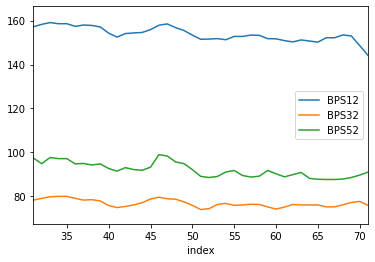

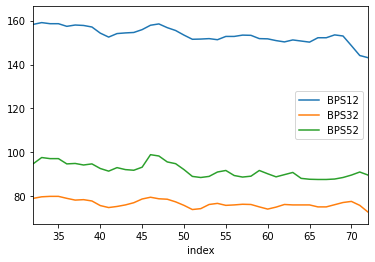

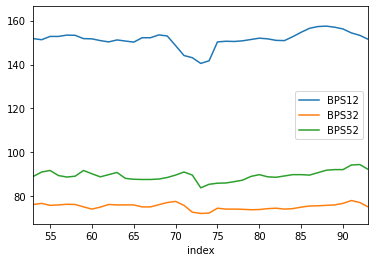

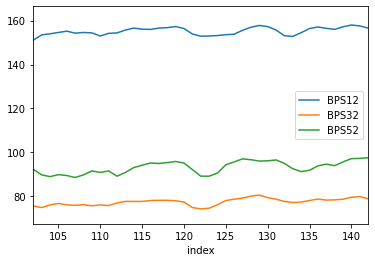

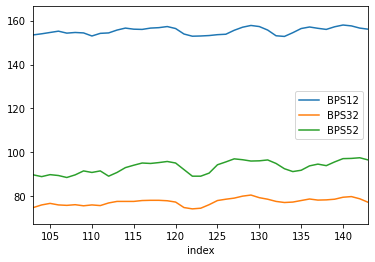

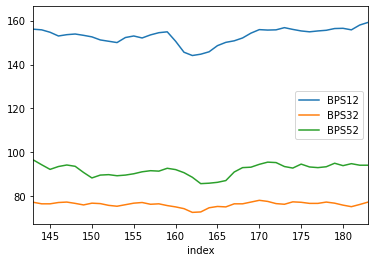

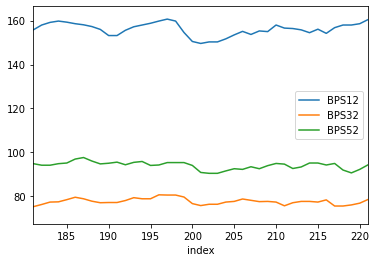

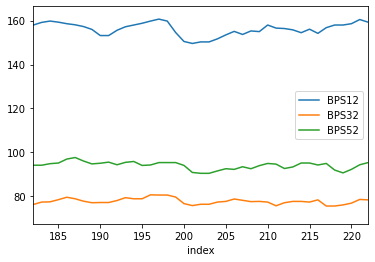

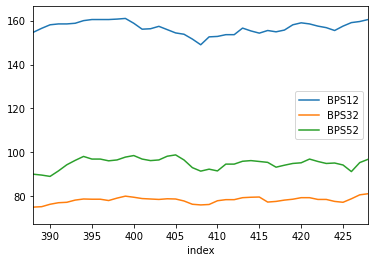

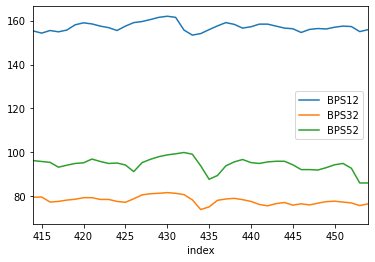

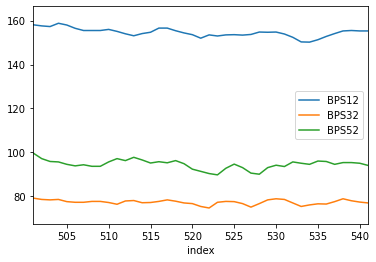

In [52]:
tno=12
df_temp=add_index(df)
for i in c_result[tno-1]:
    df_temp[triads[tno-1]].plot(xlim=[i-20,i+20])